In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart failure.csv') # UCI ML

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

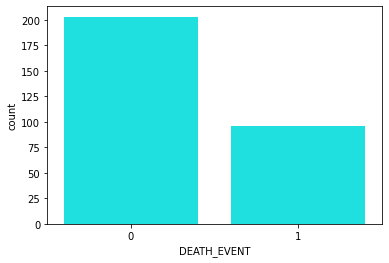

In [9]:
sns.countplot(x='DEATH_EVENT',data=df,color='cyan')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

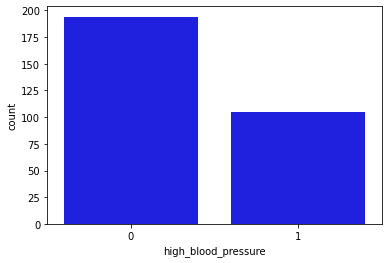

In [11]:
sns.countplot(x='high_blood_pressure',data=df,color='blue')

In [12]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

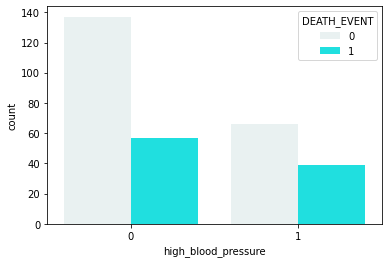

In [17]:
sns.countplot(x='high_blood_pressure',data=df, color='cyan', hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

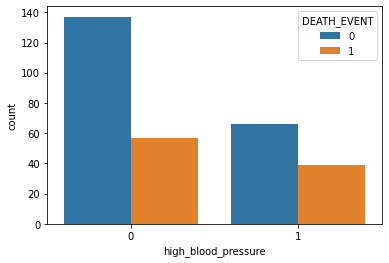

In [18]:
sns.countplot(x='high_blood_pressure',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='count', ylabel='anaemia'>

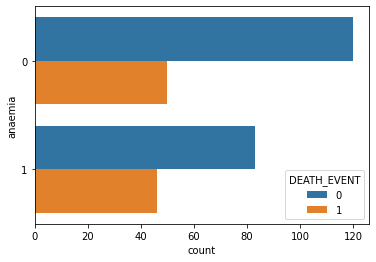

In [20]:
sns.countplot(y='anaemia',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='anaemia', ylabel='count'>

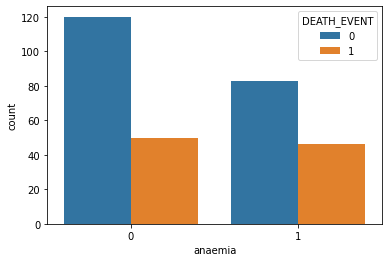

In [21]:
sns.countplot(x='anaemia',data=df, hue='DEATH_EVENT')

In [22]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

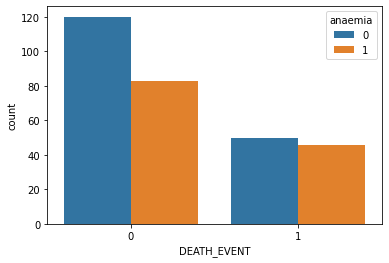

In [23]:
sns.countplot(x='DEATH_EVENT',data=df, hue='anaemia')

In [25]:
from sklearn.model_selection import train_test_split as tts
train, test = tts(df,test_size=.30, random_state=100)

In [29]:
train.shape

(209, 13)

In [32]:
x = df.drop('DEATH_EVENT',axis=1)
y = df.DEATH_EVENT

In [34]:
x.shape

(299, 12)

In [35]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30, random_state=100)

In [37]:
xtrain.shape

(209, 12)

In [38]:
xtest.shape

(90, 12)

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf = DecisionTreeClassifier()

In [41]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Model Evaluation

In [42]:
pred = clf.predict(xtest) #predicted class / y
pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [44]:
import numpy as np
np.array(ytest) # Actual class / y

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [48]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [50]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.90      0.83        59\n           1       0.73      0.52      0.60        31\n\n    accuracy                           0.77        90\n   macro avg       0.75      0.71      0.72        90\nweighted avg       0.76      0.77      0.76        90\n'

In [51]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        59
           1       0.73      0.52      0.60        31

    accuracy                           0.77        90
   macro avg       0.75      0.71      0.72        90
weighted avg       0.76      0.77      0.76        90



In [52]:
cm = confusion_matrix(ytest, pred)

In [53]:
cm

array([[53,  6],
       [15, 16]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

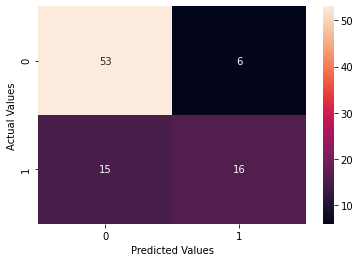

In [56]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [58]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [59]:
tp

53

In [60]:
tn

16

In [61]:
tp+tn

69

In [62]:
69 / (tp+ fn+ fp+ tn)

0.7666666666666667

In [63]:
clf.score(xtest,ytest)

0.7666666666666667

# ROC

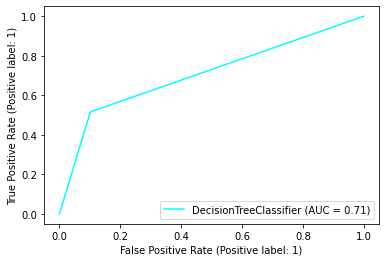

In [65]:
plot_roc_curve(clf,xtest,ytest,color='cyan')

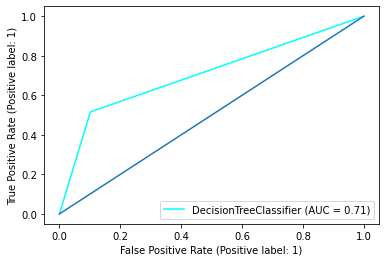

In [67]:
plot_roc_curve(clf,xtest,ytest,color='cyan')
plt.plot([0,1],[0,1])